In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath(".."))

In [4]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np

# Database
from db import PostgresDB
from schemas import Proband
from cohorts import Cohort

# Clustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

# Plotting matrix
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from plotting import plot_endpoints_for_clusters
sns.color_palette()



[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
load_dotenv()

True

In [13]:
# CLUSTERING
N_CLUSTERS = 10
N_COMPONENTS = 2

In [14]:
db = PostgresDB(
    db_name=os.getenv("DB_NAME"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

Connected to database


In [15]:
print(os.getcwd())

/home/trostalski/working_dir/Git/simpa/src/notebooks


In [16]:
PICKLE_PATH = "../scripts/sim-pickle"

In [17]:
sim_df = pd.read_pickle(PICKLE_PATH)

In [18]:
sim_df.tail()

24444941  27852814  22315030  21561373  25231391  21037088  \
24117225  0.393455  0.350316  0.389358  0.298198  0.294148  0.326182   
21430252  0.281073  0.330724  0.348874  0.265571  0.334616  0.314389   
23560173  0.337218  0.384867  0.376118  0.278823  0.328405  0.265100   
24805360  0.348179  0.303527  0.335775  0.302993  0.338033  0.348024   
29999444  0.422180  0.231512  0.385438  0.404342  0.307455  0.333031   

          21430309  28278825  22839338  28868649  ...  27787169  24117188  \
24117225  0.246647  0.374862  0.398221  0.362340  ...  0.374167  0.481216   
21430252  0.358475  0.343822  0.371607  0.296077  ...  0.310630  0.348754   
23560173  0.294855  0.299543  0.334075  0.358358  ...  0.364639  0.330487   
24805360  0.258787  0.388735  0.417733  0.355540  ...  0.330518  0.404541   
29999444  0.338426  0.347708  0.316127  0.382413  ...  0.268215  0.402978   

          20578248  27394000  20676571  24117225  21430252  23560173  \
24117225  0.367584  0.269474  0.203537  1.000000  0.319389  0.299471   
21430252  0.279744  0.352113  0.314013  0.319389  1.000000  0.304444   
23560173  0.280098  0.318146  0.235444  0.299471  0.304444  1.000000   
24805360  0.326495  0.244727  0.242514  0.400449  0.349976  0.339831   
29999444  0.322234  0.350638  0.300343  0.335547  0.305392  0.316801   

          24805360  29999444  
24117225  0.400449  0.335547  
21430252  0.349976  0.305392  
23560173  0.339831  0.316801  
24805360  1.000000  0.251554  
29999444  0.251554  1.000000  

[5 rows x 5034 columns]

<Axes: >

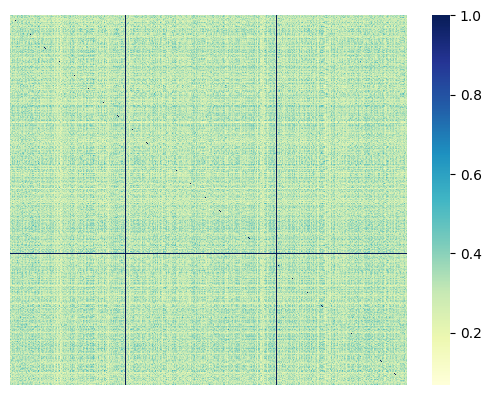

In [19]:
sns.heatmap(sim_df, xticklabels=False, yticklabels=False ,cmap="YlGnBu", fmt=".2f")

In [20]:
sns.clustermap(sim_df, annot=False, xticklabels=False, yticklabels=False, fmt=".2f", cmap="Blues")

NameError: name 'df' is not defined

In [21]:
# distance matrix for clustering
dist_df = np.subtract(1, sim_df)

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

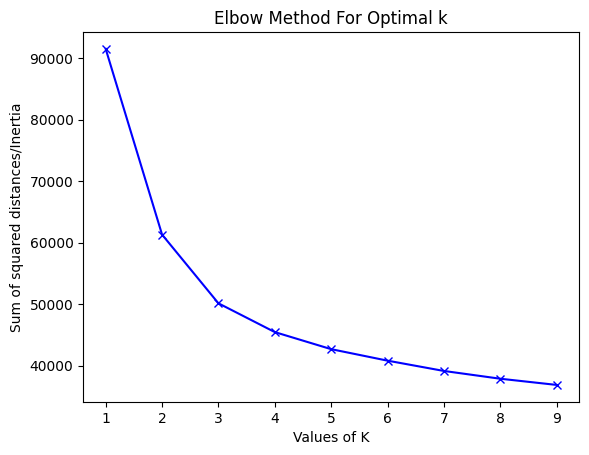

In [22]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dist_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
# Clustering

spectral_cluster = SpectralClustering(
    n_clusters=N_CLUSTERS, affinity="precomputed", n_init=100
).fit(dist_df)
agglomerative_cluster = AgglomerativeClustering(
    n_clusters=N_CLUSTERS, metric="precomputed", linkage="average"
).fit(dist_df)
kmeans_cluster = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(dist_df)
dbscan_cluster = DBSCAN(eps=0.5, min_samples=2).fit(dist_df)
affinity_cluster = AffinityPropagation().fit(dist_df)

clusters = [
    spectral_cluster,
    agglomerative_cluster,
    kmeans_cluster,
    dbscan_cluster,
    affinity_cluster,
]

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [27]:
def plot_cluster(df, cluster, pos, method):
    sns.scatterplot(x=pos[:, 0], y=pos[:, 1], hue=cluster.labels_, cmap="").set_title(
        f"{cluster.__class__.__name__}, {method.upper()}"
    )

In [29]:
mds = MDS(n_components=N_COMPONENTS, dissimilarity="precomputed", random_state=1)
mds_pos = mds.fit_transform(dist_df)

pca = PCA(n_components=N_COMPONENTS)
pca_pos = pca.fit_transform(dist_df)

tsne = TSNE(n_components=N_COMPONENTS)
tsne_pos = tsne.fit_transform(dist_df)

manifold_methods = ["mds", "pca", "tsne"]
manifold_poss = [mds_pos, pca_pos, tsne_pos]

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


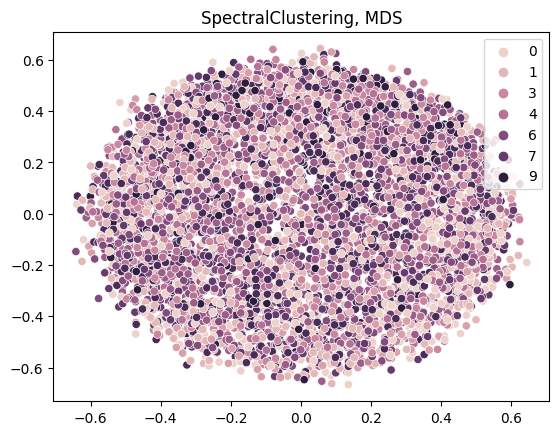

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


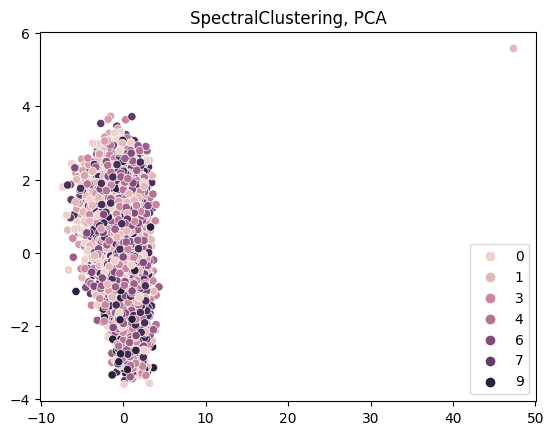

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


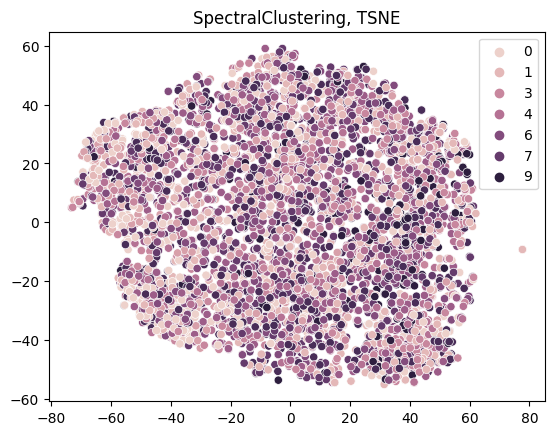

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


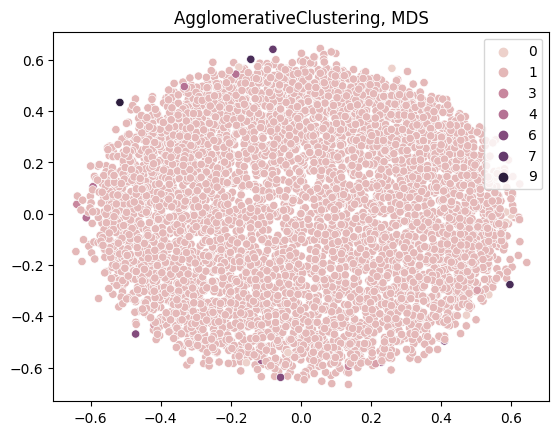

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


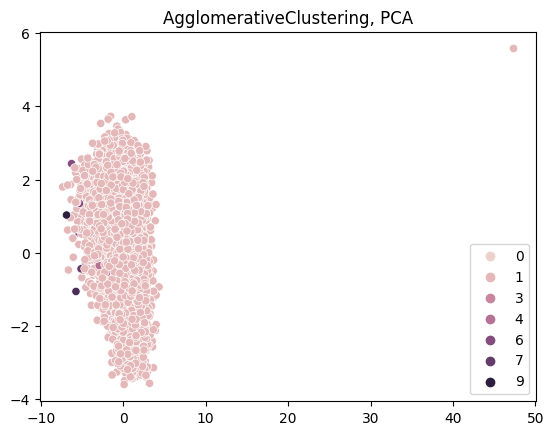

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


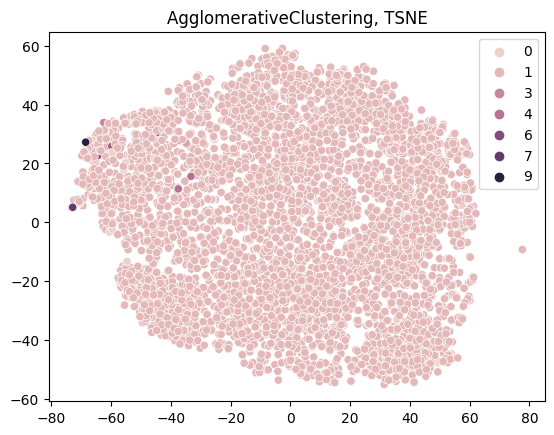

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


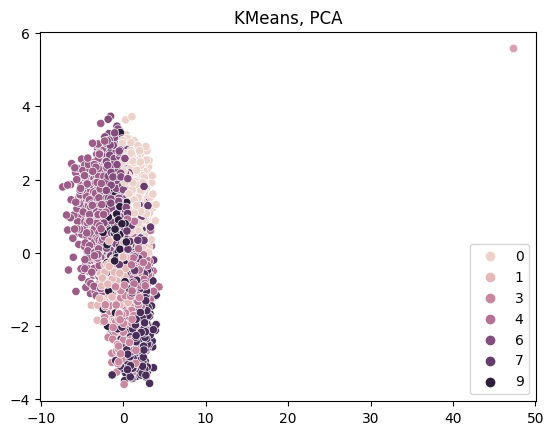

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


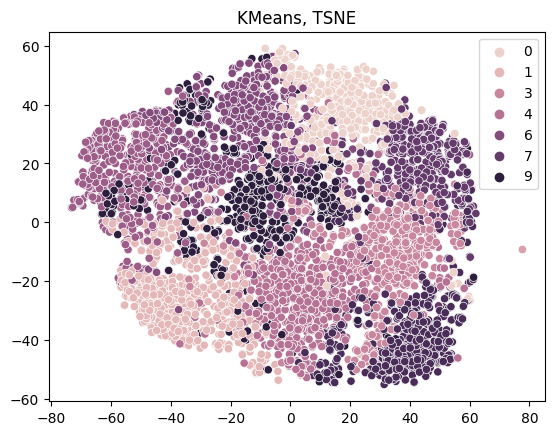

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


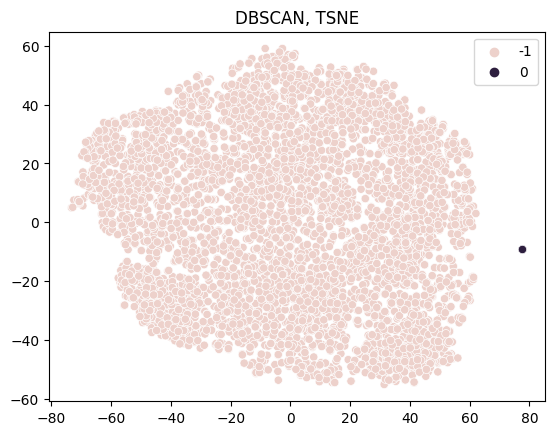

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


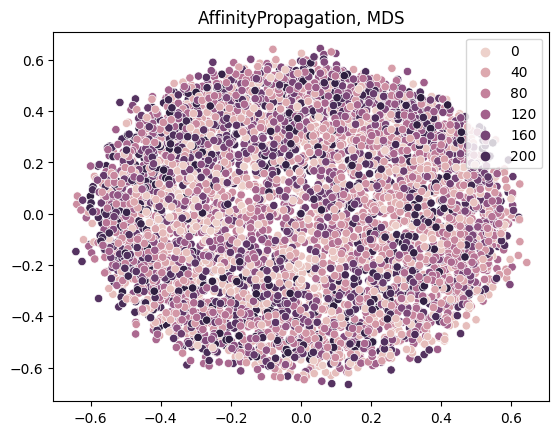

/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


/home/trostalski/working_dir/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


In [30]:
for cluster in clusters:
    for pos, method in zip(manifold_poss, manifold_methods):
        sns.scatterplot(x=pos[:, 0], y=pos[:, 1], hue=cluster.labels_, cmap="").set_title(
            f"{cluster.__class__.__name__}, {method.upper()}"
        )
        plt.show()

In [31]:
participants = [Proband(hadm_id=i) for i in dist_df.columns]
for p in participants:
    los_icu, los_hosp = db.get_endpoints_for_hadm_id(p.hadm_id)
    p.los_icu = los_icu
    p.los_hosp = los_hosp

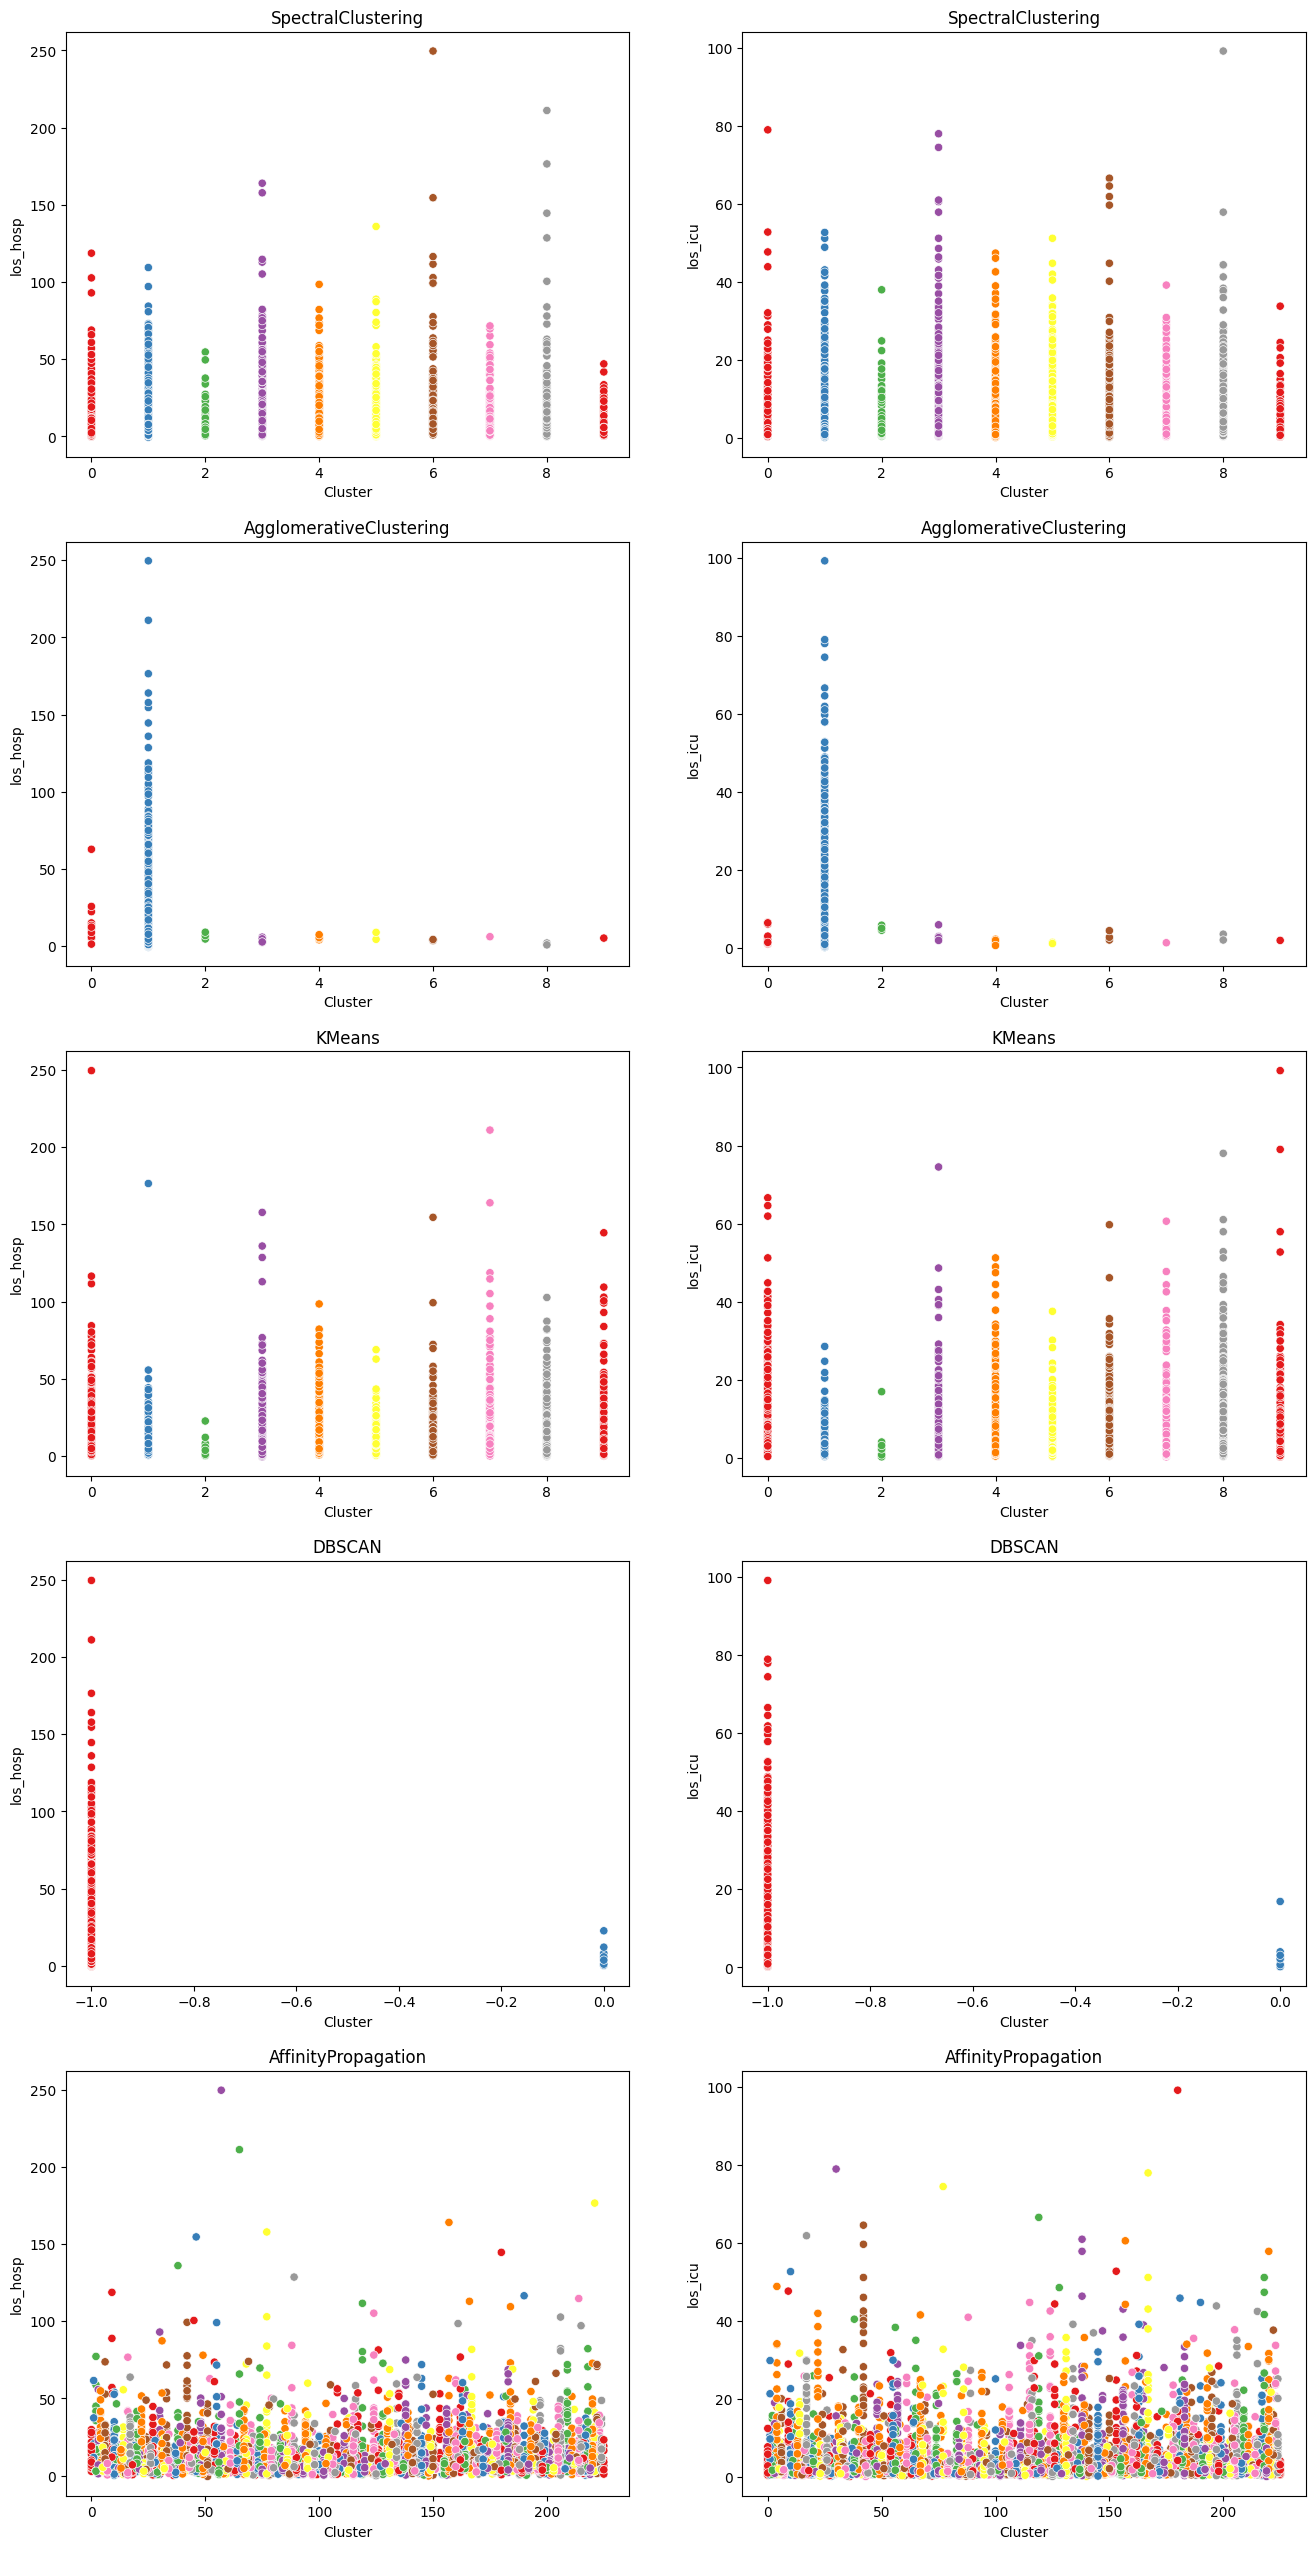

In [32]:
plot_endpoints_for_clusters(participants, clusters)